---
# title: "혼공머 Chapter 04"
date: '2022-07-01 01:00'
---

# Chapter 04-1 로지스틱 회귀
- 선형 회귀에서 출발
- 이진 분류 문제 해결
- 클래스 확률 예측
- 딥러닝에서도 사용됨

- 교재 177p
- X가 사각형일 확률 30%
- X가 삼각형일 확률 50%
- X가 원일 확률 20%

## 전체 과정 정리
- 1. 좋은 데이터
- 2. 어떤 데이터인지 탐색하고
- 3. 데이터 가공
  + 2차원 리스트로 만들기
  + 라벨링하기
- 4. 데이터 분리(훈련 세트, 테스트 세트)(train_test_split 함수)
    + 4.1. 무작위로 섞되(scikit-learn), 무작위 숫자 고정시켜야 되고(random_state), 전체 비율과 맞게 섞기(층화 샘플링)
- 5. 표준화 전처리
  + 5.1. 단위 맞춰추기 (Feature Engineering, 표준편차 활용, StandardScaler)
  + https://velog.io/@chaliechu117/Feature-Engineering
  + 5.2. 훈련 세트 데이터의 표준화 구하는 학습을 시킨다. (ss.fit)
    + ex) 평균을 구함
  + 5.3. 훈련 세트와 테스트 세트를 표준화 전처리 함. (ss.transform)
    + ex) 평균을 적용하여 전처리 함

In [ ]:
# 패키지 설치
import pandas as pd

## 데이터 불러오기
- 종분류
- 종속변수(=Y): Species 
- 독립변수: Weight, Length, Diagonal, Heightm Width
- 독립변수 여러개, 종속 변수 1개

In [ ]:
fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


## 데이터 탐색
- 종속 변수부터 확인해야 한다.
- 범위기 때문에 여러 방법을 사용할 수 있다
- 데이터에 대한 배경지식을 채울 수 있다.

In [ ]:
# 종속 변수
print(pd.unique(fish['Species']))
print(fish['Species'].value_counts())
# 검색해보고 배경 지식 채우기

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']
Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64


## 데이터 가공
- 2차원 배열로 전환
- 라벨링 (타겟)

- 독립변수

In [ ]:
# pandas 데이터 프레임에서 numpy 배열로 변환
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
fish_input.shape
# 2차원 배열이고 159행, 2열

(159, 5)

In [ ]:
print(fish_input[0:5])

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


- 타겟 =종속변수

In [ ]:
fish_target=fish['Species'].to_numpy()
print(fish_target.shape)
print(fish_target[:5])

(159,)
['Bream' 'Bream' 'Bream' 'Bream' 'Bream']


## 데이터 분리
- 훈련 데이터, 테스트 데이터 분리

In [ ]:
from sklearn.model_selection import train_test_split

# 임의 샘플링
# 캐글에서
# X_train, X_test, y_train, y_test
# X_train, X_test
train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42 # 층화샘플링도 추가해서 해보기->달라지는 결과 확인
)

## 표준화 전처리
- 여기에서도 훈련 세트의 통계 값으로 테스트 세트를 변환해야 한다는 점을 잊지 마세요!!!! 강조!!
- 1. 훈련세트와 테스트 세트를 분리하는데
- 2. (데이터 가공을 위해) 결측치를 제거하기로 했다.
- 3. 결측치는 평균값으로 대체한다고 정했다.
- 4. 원본 데이터 평균값을 대치 (X), 훈련 데이터 평균값을 대치 (O)
  + 평균값을 대치하는 순간 답지를 들고 시험을 보는 것과 같음
  + 모델 훈련을 똑바로 못함, 실전에 대입하면 다 틀림.
- 데이터 누수(Data Leakage)
  + 훈련데이터 평균값 70을 대치 (O)
  + 테스트데이터 평균값 75을 대치 (X)
  + 모든 데이터 평균값 72.5를 대치 (X)
- 사이킷런에서 이를 설명한 것
https://scikit-learn.org/stable/common_pitfalls.html
  + pipeline를 사용해라

- 기준을 맞춰라 --> 데이터 표준화 (표준 점수)
- 97~98p 수동으로 mean,std로 표준 점수 계산함.

In [ ]:
# StandardScaler : 표준화 시켜줌
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()


# 표준화 구하는 학습: ex)평균을 구함
# mean과 std는 여기서 구해진다.
ss.fit(train_input)  
# ss.fit(test_input) 이러면 절대 안된다.

# 훈련 세트와 테스트 세트를 표준화 전처리 : ex)평균을 적용하여 전처리를 함
# train_scaled = (train_input - mean) / std 와 동일 과정, 얘는 수동
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

## 모형 만들기
- K-최근접 이웃

In [ ]:
from sklearn.neighbors import KNeighborsClassifier 
kn = KNeighborsClassifier(n_neighbors = 3)
kn.fit(train_scaled, train_target)

print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.8907563025210085
0.85


- 타깃값 확인
- 알파벳 순으로 정렬

In [ ]:
print(kn.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


- 다증분류

In [ ]:
print(kn.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


- 5개 샘플에 대한 예측은 어떤 확률이냐?

In [ ]:
import numpy as np
proba = kn.predict_proba(test_scaled[:5])
print(kn.classes_)
print(np.round(proba, decimals=4))

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


- 첫번째 클래스 Perch
  + 100% 확률로 Perch로 예측
- 네번째 클라스 Perch
  + 66.7% 확률로 Perch 예측
  + 33.3% 확률로 Roach 예측

## 로지스틱 회귀
- 회귀식 : y = ax + b
  + 아무리 계산을 해도 오차가 줄지 않을 수 있다.
- 시그모이드 함수, 로지스틱 함수(피팅한다. 적합시킨다.)
  + 피팅을 하면 오차가 줄도록 결과와 회귀식을 변환시켜 식을 결과와 적합시킨다.
    - 회귀식에서 양변에 로그를 취함 -> 지수로 변환
  + 로지스틱 변환을 하고 나면 y값도 바뀌다 (숫자->확률, 0~1)
- $ z = a x (Weight) + b x (Length) + c x (Diagonal) + d x (Height) + e x (Width) +f $

### 로지스틱 회귀로 이진 분류 수행

In [ ]:
char_arr = np.array(['A', 'B', 'C', 'D', 'E'])  # train_scaled
# bream_smelt_indexes, 이 중 참인 것 만 프린트 해냄
print(char_arr[[True, False, True, False, False]])

['A' 'C']


- 도미와 빙어의 행만 골라냄

In [ ]:
# True False 리스트 만들기
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')
print(bream_smelt_indexes)

# 참인 값만 들어오게 한다.
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

train_scaled.shape, train_bream_smelt.shape

[ True False  True False False False False  True False False False  True
 False False False  True  True False False  True False  True False False
 False  True False False  True False False False False  True False False
  True  True False False False False False  True False False False False
 False  True False  True False False  True False False False  True False
 False False False False False  True False  True False False False False
 False False False False False  True False  True False False  True  True
 False False False  True False False False False False  True False False
 False  True False  True False False  True  True False False False False
 False False False False  True  True False False  True False False]


((119, 5), (33, 5))

## 모델 만들기

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

LogisticRegression()

In [ ]:
# 클래스를 예측
print(lr.predict(train_bream_smelt[:5]))

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


- 클래스 예측 보다 확률값이 더 궁금하다.
- 확률값 구하기

In [ ]:
print(lr.predict_proba(train_bream_smelt[:5]))

[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]


In [ ]:
# 클래스 속성 확인, 왼쪽 Bream, 오른쪽 Smelt
print(lr.classes_)

['Bream' 'Smelt']


- 분류 기준 : threshold 임계값을 무엇을 설정할 것이냐? (왜 0.5를 기준으로 두나?)
- 도미 vs 빙어
  - [0.51, 0.49]
  - [0.70, 0.30]
  - [0.90, 0.10]
  - 0.51 확률 도미와 0.90 확률 도미는 어감이 확실히 다르다

- 각각 독립 변수에 대한 계수와 절편

In [ ]:
# 5개 값은 5개 샘플의 로지스틱 화귀 모형의 값
print(lr.coef_, lr.intercept_)

[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


In [ ]:
# z 값 구하기 / 우리가 원한 것은 확률 값
decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions)

[-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117 ]


- z값을 확률값으로 변환

In [ ]:
from scipy.special import expit

print(expit(decisions))

[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]


## 로지스틱 회귀로 다중 분류 수행하기
- 이전 분류의 확장판

In [ ]:

# 하이퍼 파라미터 세팅
# 모형을 튜닝
# 잘 모르면 순정을 쓰세요
# 모형의 결과의 과대적합 또 과소적학을 방지하기 위한 것
# 사용해도 되나 반복문으로 여러 튜닝 결과를 비교해서 가장 좋은 값을 사용해야된다.

lr = LogisticRegression(C=20, max_iter=1000)
lr.fit(train_scaled, train_target)

print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9327731092436975
0.925


In [ ]:
print(lr.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


In [ ]:

# 확률값이 중요
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [ ]:
# 각각의 클라스가 궁금할 때
print(lr.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


- 다중 분류일 경우 선형 방정식은 어떤 모습일까?
- 분류 7개, 컬럼 값 5개에 관한 선형~

In [ ]:
print(lr.coef_.shape, lr.intercept_.shape)

(7, 5) (7,)


In [ ]:
decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals=2))

[[ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.63]
 [-10.86   1.93   4.77  -2.4    2.98   7.84  -4.26]
 [ -4.34  -6.23   3.17   6.49   2.36   2.42  -3.87]
 [ -0.68   0.45   2.65  -1.19   3.26  -5.75   1.26]
 [ -6.4   -1.99   5.82  -0.11   3.5   -0.11  -0.71]]


In [ ]:
from scipy.special import softmax

proba = softmax(decision, axis=1)
print(np.round(proba, decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


로지스틱 회귀부터 다시 보기. 헷갈림.

- 결론이해 위주
- 모형을 만들었어
- 모형이 쓸만한지 아닌지 판단하는 평가 지표.

## 평가지표 (교재X)
- 회귀 평가지표
- 결정계수 (121p)
  + (타깃-예측)^2의 합 /(타깃-평균)^2합
- 이 외에도 여러가지 지표가 있다
- 그 중 MAE, MSE, RMSE
    + (실제-예측) = 오차
    + MAE: 오차의 절댓갃의 평균
    + MSE: 오차 제곱의 평균
    + RMSE: 가장 대표적,MSE에 제곱근을 취한 값(루트 씌워줌)

- 여기서 말하는 좋은 모델이란
  + 결정계수 : 1에 수렴하면 좋은 모델
  + MAE,MSE,RMSE: 0에 수렴하면 좋은 모델

In [ ]:
import numpy as np 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score 

true = np.array([1, 2, 3, 2, 3, 5, 4, 6, 5, 6, 7, 8, 8]) # 실제값
preds = np.array([1, 1, 2, 2, 3, 4, 4, 5, 5, 7, 7, 6, 8]) # 예측값

# 절대값 오차의 평균
mae = mean_absolute_error(true,preds)
print(mae)

# 제곱 오차의 평균
mse = mean_squared_error(true,preds)
print(mse)

# 제곱 오차의 평균
mse = mean_squared_error(true, preds)
print(mse)

# mse 제곱근
rmse = np.sqrt(mse)
print(rmse)

# 결정계수
r2 = r2_score(true, preds)
print(r2)

# 대표적인 방법. 회귀 평가지표

0.5384615384615384
0.6923076923076923
0.6923076923076923
0.8320502943378437
0.8617021276595744


## 분류 평가지표
- 오차 행렬
- 실제 값
  + [빙어, 도미, 도미, 빙어, 도미]
- 예측 값
  + [빙어, 빙어, 도미, 빙어, 빙어]

- TP, TN, FP, FN
  + TP = 5, TN = 5, FP = 3, FN = 7
  + 정확도 (스팸메일): (TP + TN) / (TP + TN + FP + FN) 
  + 정밀도(Precision) : 양성이라고 예측한 값 (TP + FP) 중 실제 양성인 값의 비율
  + 재현율 (의료, 그만큼 보수적): 실제 양성 값 중 양성으로 예측한 값(TP)의 비율

- 코로나 검사
  + 양성(1) : 음성(99)
  + 머신러닝 모형 : 98% / 정밀도 99
  + 인간 음성진단 : 99% / 정밀도 95
- 검사자가 실제는 양성, 진단은 음성으로 내림

  + 로그손실
  + ROC Curve (= AUC) (중요)

In [ ]:
from sklearn.metrics import confusion_matrix

true = [0, 1, 1, 0, 0]
preds = [1, 0, 0, 0, 0]

confusion_matrix(true, preds)

array([[2, 1],
       [2, 0]])

# Chapter 04-2 확률적 경사 하강법
- 점진적 학습 (step, 보폭)
  + 보폭이 빠르면 내려오는 시간은 빠르나 주변을 제대로 보기 힘들어 정확성이 떨어진다
  + 그러나 보폭을 좁게 내려오면 정확성은 올라가나 시간이 오래 걸린다.
- 학습률
- XGBoost, LightGBM, 딥러닝(이미지 분류, 자연어 처리, 옵티마이저_)

### 샘플
- 배치: 몇개로 나눈다
- 에포크: 한 바뀌 돌았다.
  + 한 번 끝날 때 마다 평가지표가 나온다.
  + 초기 평가지표는 성능이 낮고 시간이 지날 수록 성능이 높아진다. 
- 신경망 (이미지 데이터, 자연어 데이터)
- 자율주행 하루 데이터 1TB -> 학습
- 한꺼번에 모든 데이터를 학습하기 어려움
  + 샘플링, 배치, 에포크, 오차(=손실=loss)가 가장 작은 지점을 찾아야 함.
  + 결론적으로 확률적 경사 하강법이 필요하다.
- 손실함수: 시간을 효율적이게 쓰면서, 손실은 적은.

### 손실함수
- 로지스틱 손실 함수

In [ ]:
import pandas as pd
fish = pd.read_csv("http://bit.ly/fish_csv_data")
fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Species   159 non-null    object 
 1   Weight    159 non-null    float64
 2   Length    159 non-null    float64
 3   Diagonal  159 non-null    float64
 4   Height    159 non-null    float64
 5   Width     159 non-null    float64
dtypes: float64(5), object(1)
memory usage: 7.6+ KB


- 입력 데이터와 타깃 데이터 분리

In [ ]:
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

fish_input.shape, fish_target.shape

((159, 5), (159,))

- 훈련 세트와 테스트 세트 분리

In [ ]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42 
)

- 훈련 세트와 테스트 세트의 특성 표준화
  + 무게, 길이, 대각선 길이, 높이, 너비
- 표준화 처리 진행

In [ ]:
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

# train_scaled[:5]

array([[ 0.91965782,  0.60943175,  0.81041221,  1.85194896,  1.00075672],
       [ 0.30041219,  1.54653445,  1.45316551, -0.46981663,  0.27291745],
       [-1.0858536 , -1.68646987, -1.70848587, -1.70159849, -2.0044758 ],
       [-0.79734143, -0.60880176, -0.67486907, -0.82480589, -0.27631471],
       [-0.71289885, -0.73062511, -0.70092664, -0.0802298 , -0.7033869 ]])

## 모델링
- 확률적 경사 하강법

In [ ]:
# 시그모이드 로지스틱 손실 함수
from sklearn.linear_model import SGDClassifier
sc = SGDClassifier(loss = 'log', max_iter = 10, random_state=42)

sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

# 결과 해석
# /usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.ConvergenceWarning,
# 더 개선 할 것이 있는데 에포크 숫자가 10만에 끊겨버림, 학습이 덜됐다.

0.773109243697479
0.775


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


partial_fit()메서드 사용하면 추가 학습.

In [ ]:
sc.partial_fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8487394957983193
0.9


## 에포그와 과대/과소 적합
- 에포크 숫자가 적으면 --> 덜 학습
- 에포크 숫자가 과도하게 높으면 --> 산을 헤멤.
- 끊는 시점을 정하는게 관건.
- eatly_stopping (최근 나온 알고리즘은 대부분 이런 기능이 있다.)
  + 에포크 숫자를 1000 지정, 손실 10, 9, 8, ..3(이하로 안내려감)
  + 3에 도달한 시점이 150
  + 그럼 강제로 끊어줌.

In [ ]:
import numpy as np
sc = SGDClassifier(loss ='log', random_state = 42)
train_score = []
test_score = []

classes = np.unique(train_target)

# 300번 에포크 훈련을 반복
# 훈련 할 때마다, train_score, test_score 추가를 한다.

for _ in range(0, 300):
  sc.partial_fit(train_scaled, train_target, classes = classes)
  train_score.append(sc.score(train_scaled, train_target))
  test_score.append(sc.score(test_scaled, test_target)) 

- 시각화

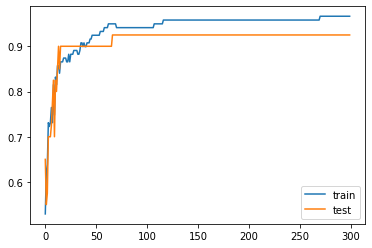

In [ ]:
import matplotlib.pyplot as plt 
plt.plot(train_score)
plt.plot(test_score)
plt.legend(["train", "test"])
plt.show()

# 결과 해석
# 노란색이 파란색 그래프보다 위에 있음 -> 과소 적합
# 노란색이 파란색 그래프 간격이 가장 좁음 -> 적당한 모델
# 노란색이 파란색 그래프 간격이 멀어짐 -> 과대 적합 

## XGBoost, LightGBM 코드
- train-loss, train-accuary, test-loss, test-accu